In [5]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt
from skfuzzy import control as ctrl

In [6]:
def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

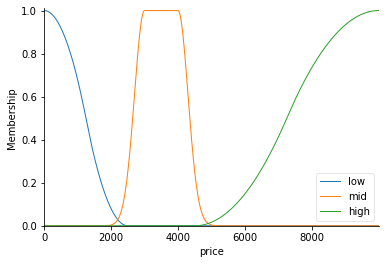

In [15]:
price = ctrl.Antecedent(np.arange(0, 10000, 0.1), "price")

price['low'] = skf.zmf(price.universe, 0, 2500)
price["mid"] = skf.gauss2mf(price.universe, 3000, 300, 4000, 300)
price["high"] = skf.smf(price.universe, 4500, 10000)

price.view()

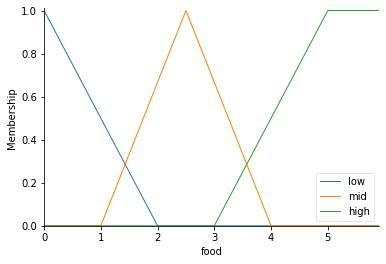

In [8]:
food = ctrl.Antecedent(np.arange(0, 6, 0.1), "food")

food['low'] = trapezoid(food.universe, -1, 0, 0, 2)
food["mid"] = trapezoid(food.universe, 1, 2.5, 2.5, 4)
food["high"] = trapezoid(food.universe, 3, 5, 10, 10)

food.view()

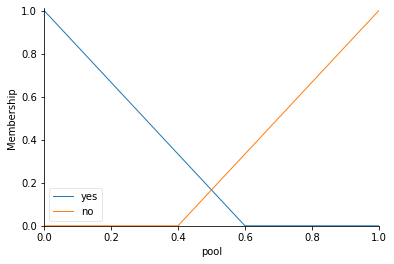

In [9]:
pool = ctrl.Antecedent(np.arange(0, 1.1, 0.1), "pool")

pool['yes'] = trapezoid(pool.universe, -1, 0, 0, 0.6)
pool['no'] = trapezoid(pool.universe, 0.4, 1, 1, 2)

pool.view()

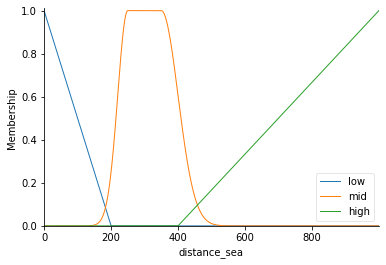

In [10]:
distance_sea = ctrl.Antecedent(np.arange(0, 1000, 0.1), "distance_sea")

distance_sea['low'] = trapezoid(distance_sea.universe, -1, 0, 0, 200)
distance_sea["mid"] = skf.gauss2mf(distance_sea.universe, 250, 30, 350, 50)
distance_sea["high"] = trapezoid(distance_sea.universe, 400, 1000, 1100, 1100)

distance_sea.view()

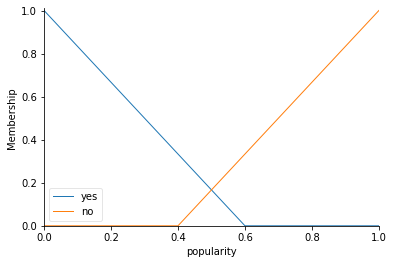

In [11]:
popularity = ctrl.Consequent(np.arange(0, 1.1, 0.1), "popularity")

popularity['yes'] = trapezoid(popularity.universe, -1, 0, 0, 0.6)
popularity['no'] = trapezoid(popularity.universe, 0.4, 1, 1, 2)

popularity.view()

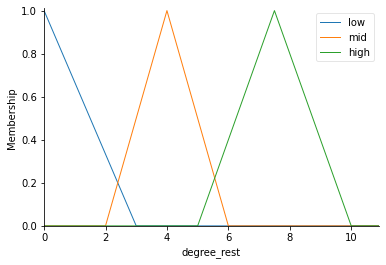

In [12]:
degree_rest = ctrl.Consequent(np.arange(0, 11, 0.1), "degree_rest")

degree_rest['low'] = trapezoid(degree_rest.universe, -1, 0, 0, 3)
degree_rest["mid"] = trapezoid(degree_rest.universe, 2, 4, 4, 6)
degree_rest["high"] = trapezoid(degree_rest.universe, 5, 7.5, 7.5, 10)

degree_rest.view()

In [13]:
rule1 = ctrl.Rule(price['mid'] & distance_sea['mid'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule2 = ctrl.Rule(price['low'] & distance_sea['mid'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['low']])
rule3 = ctrl.Rule(price['high'] & distance_sea['mid'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule4 = ctrl.Rule(price['mid'] & distance_sea['high'] & food['mid'] & pool['yes'], 
                  [popularity['no'], degree_rest['mid']])
rule5 = ctrl.Rule(price['mid'] & distance_sea['low'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule6 = ctrl.Rule(price['mid'] & distance_sea['mid'] & food['low'] & pool['yes'], 
                  [popularity['no'], degree_rest['mid']])
rule7 = ctrl.Rule(price['mid'] & distance_sea['mid'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule8 = ctrl.Rule(price['mid'] & distance_sea['mid'] & food['mid'] & pool['no'], 
                  [popularity['no'], degree_rest['mid']])
rule9 = ctrl.Rule(price['low'] & distance_sea['low'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['low']])
rule10 = ctrl.Rule(price['low'] & distance_sea['high'] & food['mid'] & pool['yes'], 
                  [popularity['no'], degree_rest['low']])
rule11 = ctrl.Rule(price['high'] & distance_sea['low'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule12 = ctrl.Rule(price['high'] & distance_sea['high'] & food['mid'] & pool['yes'], 
                  [popularity['no'], degree_rest['mid']])
rule13 = ctrl.Rule(price['low'] & distance_sea['mid'] & food['low'] & pool['yes'], 
                  [popularity['no'], degree_rest['low']])
rule14 = ctrl.Rule(price['low'] & distance_sea['mid'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule15 = ctrl.Rule(price['high'] & distance_sea['mid'] & food['low'] & pool['yes'], 
                  [popularity['no'], degree_rest['low']])
rule16 = ctrl.Rule(price['high'] & distance_sea['mid'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule17 = ctrl.Rule(price['high'] & distance_sea['mid'] & food['mid'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule18 = ctrl.Rule(price['high'] & distance_sea['mid'] & food['mid'] & pool['no'], 
                  [popularity['no'], degree_rest['low']])
rule19 = ctrl.Rule(price['mid'] & distance_sea['high'] & food['low'] & pool['yes'], 
                  [popularity['no'], degree_rest['low']])
rule20 = ctrl.Rule(price['mid'] & distance_sea['high'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule21 = ctrl.Rule(price['mid'] & distance_sea['low'] & food['low'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule22 = ctrl.Rule(price['mid'] & distance_sea['low'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule23 = ctrl.Rule(price['mid'] & distance_sea['high'] & food['mid'] & pool['no'], 
                  [popularity['no'], degree_rest['low']])
rule24 = ctrl.Rule(price['mid'] & distance_sea['low'] & food['mid'] & pool['no'], 
                  [popularity['no'], degree_rest['mid']])
rule25 = ctrl.Rule(price['mid'] & distance_sea['mid'] & food['low'] & pool['no'], 
                  [popularity['no'], degree_rest['low']])
rule26 = ctrl.Rule(price['mid'] & distance_sea['mid'] & food['high'] & pool['no'], 
                  [popularity['no'], degree_rest['mid']])
rule27 = ctrl.Rule(price['high'] & distance_sea['low'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['high']])
rule28 = ctrl.Rule(price['low'] & distance_sea['high'] & food['low'] & pool['yes'], 
                  [popularity['no'], degree_rest['mid']])
rule29 = ctrl.Rule(price['high'] & distance_sea['low'] & food['high'] & pool['no'], 
                  [popularity['yes'], degree_rest['high']])
rule30 = ctrl.Rule(price['low'] & distance_sea['high'] & food['low'] & pool['no'], 
                  [popularity['no'], degree_rest['low']])
rule31 = ctrl.Rule(price['high'] & distance_sea['high'] & food['high'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule32 = ctrl.Rule(price['high'] & distance_sea['low'] & food['low'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule33 = ctrl.Rule(price['low'] & distance_sea['high'] & food['low'] & pool['yes'], 
                  [popularity['yes'], degree_rest['mid']])
rule34 = ctrl.Rule(price['low'] & distance_sea['low'] & food['low'] & pool['yes'], 
                  [popularity['no'], degree_rest['mid']])

In [14]:
rules_base = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule23, rule24, rule25, rule26, rule28,
              rule29, rule31, rule32, rule33, rule34]

mark_ctrl = ctrl.ControlSystem(rules_base)
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.21666666666666665
4.000000000000001


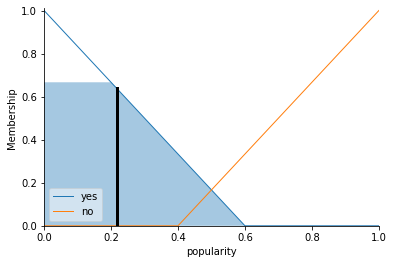

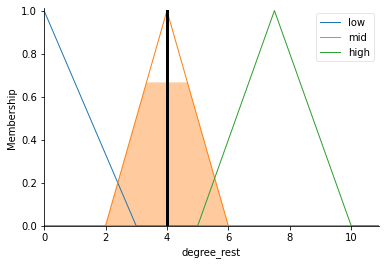

In [16]:
#1
marking.input['price'] = 3800
marking.input['food'] = 2
marking.input['distance_sea'] = 380
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.21666666666666665
1.0833333333333337


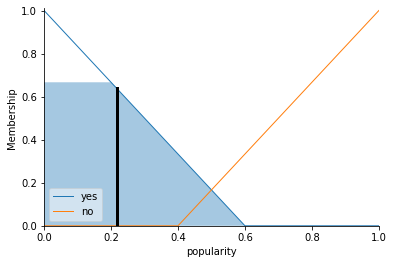

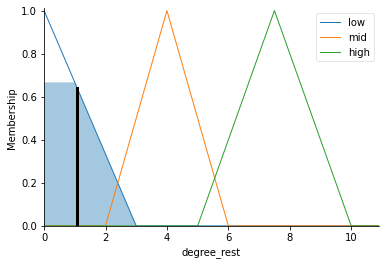

In [17]:
#2
marking.input['price'] = 200
marking.input['food'] = 3
marking.input['distance_sea'] = 55
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.7758349040645692
1.1208254796771548


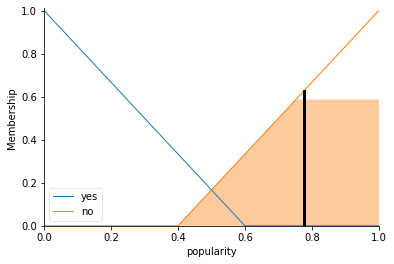

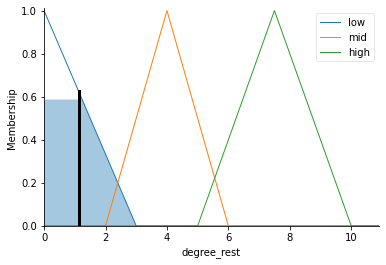

In [18]:
#3
marking.input['price'] = 7500
marking.input['food'] = 3
marking.input['distance_sea'] = 365
marking.input['pool'] = 1
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.21000000020158946
4.000000000000001


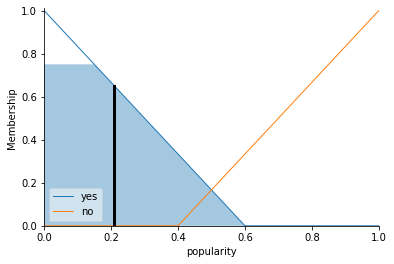

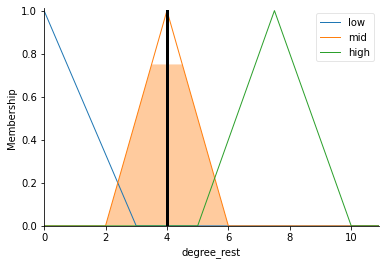

In [19]:
#4
marking.input['price'] = 3256
marking.input['food'] = 0
marking.input['distance_sea'] = 50
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.7759901613537977
1.120049193231073


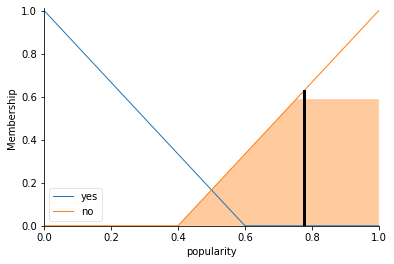

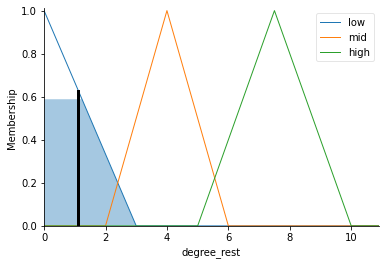

In [20]:
#5
marking.input['price'] = 3653
marking.input['food'] = 3
marking.input['distance_sea'] = 753
marking.input['pool'] = 1
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.24911564625850335
4.000006257348444


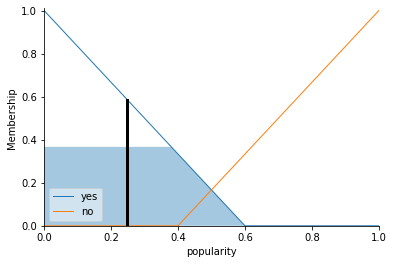

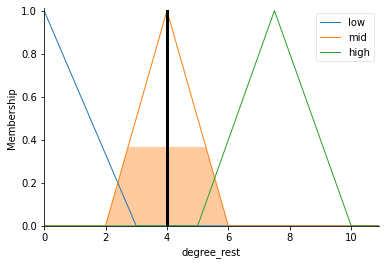

In [21]:
#6
marking.input['price'] = 7100
marking.input['food'] = 5
marking.input['distance_sea'] = 620
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.7666666666666666
3.9999999998134737


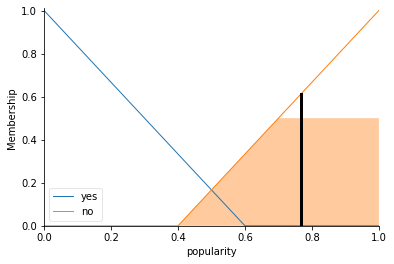

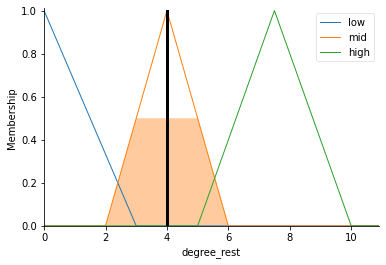

In [22]:
#7
marking.input['price'] = 343
marking.input['food'] = 1
marking.input['distance_sea'] = 43
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.2999999999664955
7.500000013986248


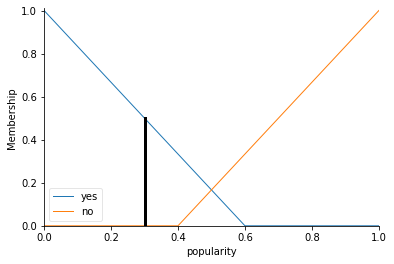

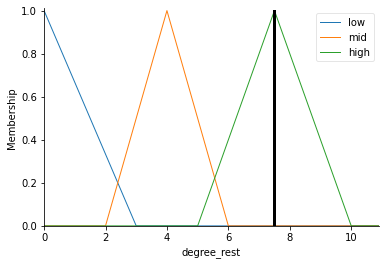

In [33]:
#8
marking.input['price'] = 7500
marking.input['food'] = 5
marking.input['distance_sea'] = 50
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.7804798534798533
3.999999999999999


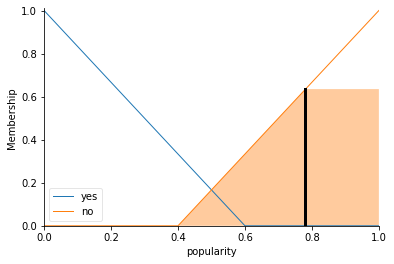

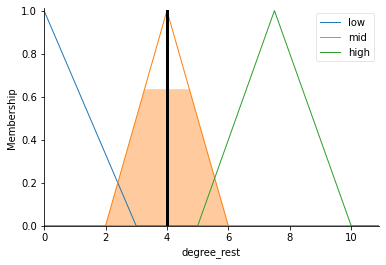

In [30]:
#9
marking.input['price'] = 3956
marking.input['food'] = 2
marking.input['distance_sea'] = 73
marking.input['pool'] = 1
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)

0.2320164988352509
3.999999999954716


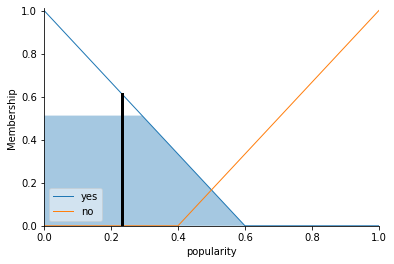

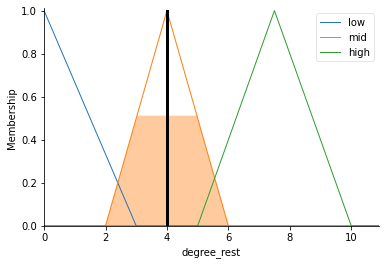

In [31]:
#10
marking.input['price'] = 7283
marking.input['food'] = 0
marking.input['distance_sea'] = 37
marking.input['pool'] = 0
marking.compute()

print(marking.output['popularity'])
popularity.view(sim=marking)
print(marking.output['degree_rest'])
degree_rest.view(sim=marking)